<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/2348568_lab2_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Program_2_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.shape

(506, 14)

In [6]:
# Print the list of column names
print(df.columns)


Index(['Crime_Rate', 'Non_Retail_Acres', 'NOX', 'Avg_rooms ', 'AGE',
       'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO', 'B', 'LSTAT',
       'MValue'],
      dtype='object')


In [8]:
features= ['Avg_rooms ','Non_Retail_Acres','Distance','Property_TaxRate']  # Predictor
target= ['MValue']  # Target variable

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
x=df[features]
y=df[target]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
vif=pd.Series([variance_inflation_factor(x.values,idx) for idx in range(x.shape[1])],index=x.columns)
print(vif)


Avg_rooms           16.747965
Non_Retail_Acres     9.598374
Distance             6.880607
Property_TaxRate    13.861510
dtype: float64


Since all four features have VIF greater than 5, we can conclude that these features are highly correlated. But here we take features whose VIF are greater than 10 i.e Avg_rooms, Property_TaxRate

In [27]:
selected_predictors = ['Avg_rooms ', 'Property_TaxRate']

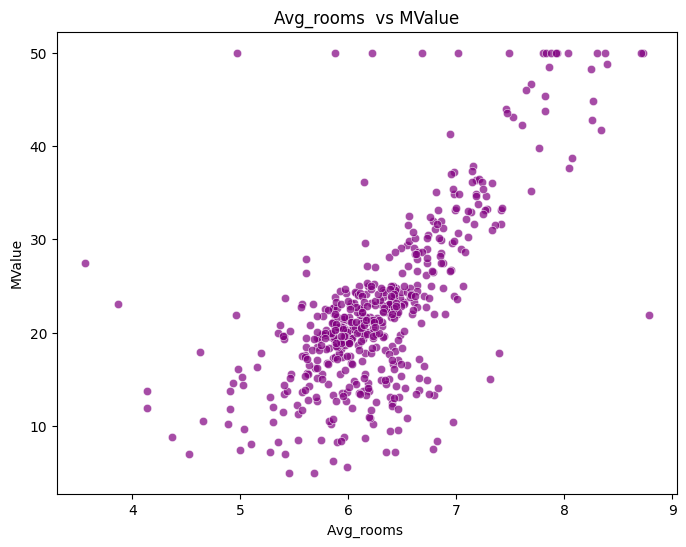

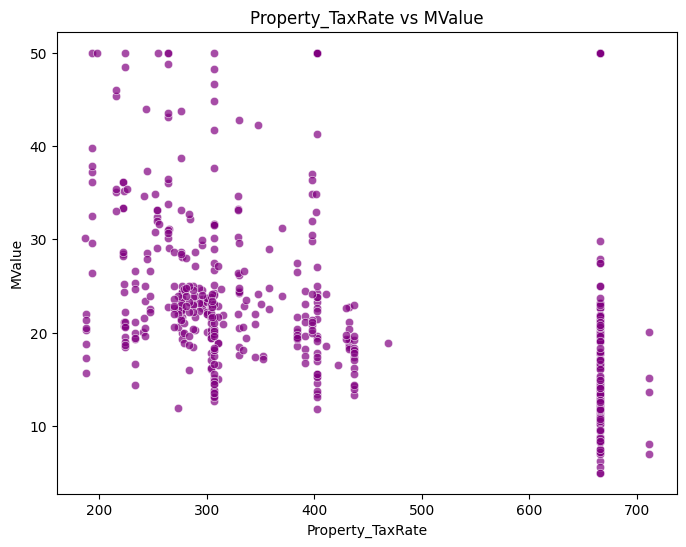

In [28]:
for predictor in selected_predictors:
  plt.figure(figsize=(8, 6))  # Adjust the figure size
  sns.scatterplot(x=x[predictor],y= df['MValue'],color='purple',alpha=0.7)
  plt.title(f'{predictor} vs MValue')
  plt.xlabel(predictor)
  plt.ylabel('MValue')
  plt.show()

In [36]:
#model with single predictor
model1=LinearRegression()
features=['Avg_rooms ']
target=['MValue']
model1.fit(df[features],df[target])
print(model1.score(df[features],df[target]))

0.4835254559913339


In [37]:
model1=LinearRegression()
features=['Property_TaxRate']
target=['MValue']
model1.fit(df[features],df[target])
print(model1.score(df[features],df[target]))

0.21952592104421886


In [33]:
X = df[['Avg_rooms ', 'Property_TaxRate']]  # Predictor
y = df['MValue']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

#initialising the algorithm
model=LinearRegression()

#Selecting predictors and targets
x1=X_train
y1=y_train

#Building model
model.fit(x1,y1)

print("Intercept:",model.intercept_,'\nCoefficients',model.coef_)

Intercept: -22.195130511892735 
Coefficients [ 8.12284998 -0.01505298]


For linear regression model to be valid, it is essential that predictors are linearly independent of each other

expected MValue=-22.195130511892735 + 8.12284998(Avg_rooms) + -0.01505298(Property_TaxRate)+error

In [40]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('Mean Squared Error (Train):', mean_squared_error(y_train, y_train_pred))
print('Mean Squared Error (Test):', mean_squared_error(y_test, y_test_pred))

print('R-squared (Train):', r2_score(y_train, y_train_pred))
print('R-squared (Test):', r2_score(y_test, y_test_pred))

Coefficients: [ 8.12284998 -0.01505298]
Intercept: -22.195130511892735
Mean Squared Error (Train): 41.83004494571364
Mean Squared Error (Test): 27.639798091066655
R-squared (Train): 0.5414802379102617
R-squared (Test): 0.6068186800083762
